### Steps before deployment

- Cargar el modelo entrenado con el script de training.
- Genererar el preprocesamiento de los datos a inferir
- Realizar las inferencias corriendo del modelo

### Library import

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
from matplotlib.pyplot import figure

#---- CNN model libraries ----
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Data preprocessing
Data generator to rescale the image values.
Then import the data from directory

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
validation_path = 'Dataset/validation/'
image_width = 64
image_height = 64
color_channels = 1
data_classes = ['Tornado', 'CBR', 'Biz', 'Goldwing']
batch_size = len(os.listdir(path))

validation_dataset = test_datagen.flow_from_directory(validation_path,
                                                        target_size = (image_width, image_height),
                                                        color_mode = 'grayscale',
                                                        batch_size = batch_size,
                                                        classes = data_classes, 
                                                        class_mode = None,
                                                        shuffle = False)

Found 52 images belonging to 4 classes.


#### Model loading
Loading the trained model using the same architecture and weights from the training script.

In [19]:
classifier = load_model(filepath='honda_classifier.H5')

### Predictions

Reading data from directory- Then predict the values using the model.

In [20]:
path = 'Dataset/Prueba/'
img_path = []
for count, filename in enumerate(os.listdir(path)):
    img_path.append(path + filename)

In [21]:
predicted_images = []
predicted_labels = []
for path in img_path:
    image = tf.keras.preprocessing.image.load_img(path, color_mode= 'grayscale', 
                                                  target_size=(64,64),
                                                  interpolation= 'nearest')
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    predicted_class_indices=classifier.predict_classes(input_arr)
    labels=(validation_dataset.class_indices)
    labels2=dict((v,k) for k,v in labels.items())
    predictions=[labels2[k] for k in predicted_class_indices]
    
    image_to_show = tf.keras.preprocessing.image.load_img(path, color_mode= 'grayscale',
                                                          target_size=(256,256),
                                                          interpolation= 'nearest')
    predicted_images.append(image_to_show)
    predicted_labels.append(predictions[0])

Data and prediction print

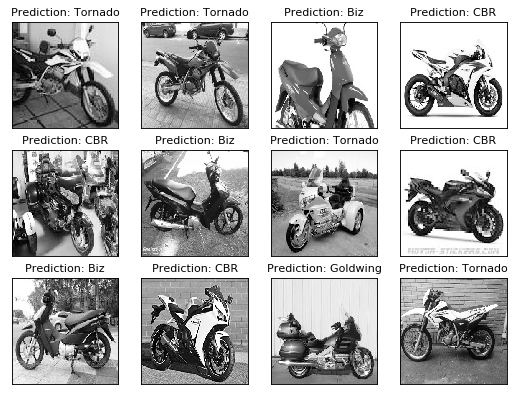

In [22]:
figure(figsize=(8, 6), dpi=80)
nrow = 3
ncols = 4
for i in range(12):
    plt.subplot(nrow, ncols, i+1)
    plt.imshow(predicted_images[i], cmap = 'Greys_r')
    plt.title('Prediction: '+str(predicted_labels[i]), fontsize = 10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)